In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.express as px

from IPython.display import display, clear_output
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score


# 1. Importing the dataset and cleaning it

In [3]:
df = pd.read_csv("../datasets/asylum_seekers.csv")
display(df.head(5))

C:\Users\Dell\AppData\Local\Temp\ipykernel_19048\2748457908.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/asylum_seekers.csv")


,Year,Territory of Assylum,Origin,RSD procedure,Pending,UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Closed,Total decisions,Total pending end-year,UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129720 entries, 0 to 129719
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Year                        129720 non-null  int64 
 1   Territory of Assylum        129720 non-null  object
 2   Origin                      129720 non-null  object
 3   RSD procedure               129719 non-null  object
 4   Pending                     124578 non-null  object
 5   UNHCR-assisted(start-year)  118962 non-null  object
 6   Applied during year         126222 non-null  object
 7   decisions_recognized        119886 non-null  object
 8   decisions_other             114974 non-null  object
 9   Rejected                    121615 non-null  object
 10  Closed                      120850 non-null  object
 11  Total decisions             97082 non-null   object
 12  Total pending end-year      125832 non-null  object
 13  UNHCR-assisted(end-year)    1

In [6]:
# dropping null values to ensure that we have a unified dataset prior to analysis
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85187 entries, 0 to 129709
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        85187 non-null  int64 
 1   Territory of Assylum        85187 non-null  object
 2   Origin                      85187 non-null  object
 3   RSD procedure               85187 non-null  object
 4   Pending                     85187 non-null  object
 5   UNHCR-assisted(start-year)  85187 non-null  object
 6   Applied during year         85187 non-null  object
 7   decisions_recognized        85187 non-null  object
 8   decisions_other             85187 non-null  object
 9   Rejected                    85187 non-null  object
 10  Closed                      85187 non-null  object
 11  Total decisions             85187 non-null  object
 12  Total pending end-year      85187 non-null  object
 13  UNHCR-assisted(end-year)    85187 non-null  o

# 2. Data Exploration and Feature Preparation

In [7]:
# checking for duplicate rows in the dataset that might skew our initial model
duplicates = df.duplicated().sum()
print(duplicates)

0


In [8]:
# performing a feature engineering. 
# I want to see the acceptance rates which i can obtain by 
# dividing total acceptances to intial applications


df['decisions_recognized'] = pd.to_numeric(df['decisions_recognized'], errors='coerce')
df['Total decisions'] = pd.to_numeric(df['Total decisions'], errors='coerce')

df['Acceptance Rate (%)'] = ((df['decisions_recognized'] / df['Total decisions']) * 100).round(2)
# df.drop(columns='Acceptance Rate', inplace=True)
df.dropna(inplace=True)
df.info()

df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84662 entries, 0 to 129680
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        84662 non-null  int64  
 1   Territory of Assylum        84662 non-null  object 
 2   Origin                      84662 non-null  object 
 3   RSD procedure               84662 non-null  object 
 4   Pending                     84662 non-null  object 
 5   UNHCR-assisted(start-year)  84662 non-null  object 
 6   Applied during year         84662 non-null  object 
 7   decisions_recognized        84662 non-null  float64
 8   decisions_other             84662 non-null  object 
 9   Rejected                    84662 non-null  object 
 10  Closed                      84662 non-null  object 
 11  Total decisions             84662 non-null  float64
 12  Total pending end-year      84662 non-null  object 
 13  UNHCR-assisted(end-year)    84

,Year,Territory of Assylum,Origin,RSD procedure,Pending,UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Closed,Total decisions,Total pending end-year,UNHCR-assisted(end-year),Acceptance Rate (%)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5.0,0,0,0,5.0,0,0,100.00
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747.0,0,112,327,1186.0,1235,1235,62.98
3,2000,United States Of America,Afghanistan,G / EO,196,0,225,151.0,0,31,68,250.0,171,0,60.40
4,2000,United States Of America,Afghanistan,G / IN,193,0,218,182.0,0,51,40,273.0,150,0,66.67
5,2000,Ukraine,Afghanistan,G / FI,40,0,662,275.0,0,412,0,687.0,23,0,40.03
6,2000,Turkey,Afghanistan,U / FI,67,67,81,29.0,0,24,49,102.0,46,46,28.43
7,2000,Turkmenistan,Afghanistan,U / FI,416,416,169,126.0,0,121,210,457.0,128,128,27.57
8,2000,Tajikistan,Afghanistan,G / FI,2172,30,165,112.0,0,0,1992,2104.0,233,40,5.32
9,2000,Thailand,Afghanistan,U / AR,0,0,2,1.0,0,1,0,2.0,0,0,50.00
10,2000,Thailand,Afghanistan,U / FI,5,0,25,14.0,1,2,4,21.0,9,5,66.67


In [9]:
df['decisions_recognized'].describe()

count    84662.000000
mean        35.229442
std        570.207748
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      97656.000000
Name: decisions_recognized, dtype: float64

In [10]:
df['Acceptance Rate (%)'].describe()

count    84662.000000
mean        16.019936
std         28.923655
min          0.000000
25%          0.000000
50%          0.000000
75%         18.790000
max        100.000000
Name: Acceptance Rate (%), dtype: float64

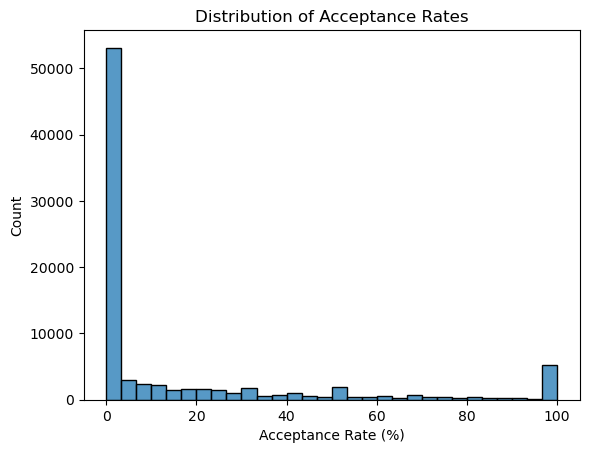

In [11]:
sns.histplot(df['Acceptance Rate (%)'], bins=30)
plt.title("Distribution of Acceptance Rates")
plt.show()


#on this diagram, count represents the number of  people in the dataset

In [12]:
#calaculating the mean acceptance rate for each year
df['Year']
acceptance_by_year = df.groupby('Year', as_index=False)['Acceptance Rate (%)'].mean()
acceptance_by_year

,Year,Acceptance Rate (%)
0,2000,16.174171
1,2001,18.708206
2,2002,15.194127
3,2003,15.110630
4,2004,15.693570
5,2005,15.450725
6,2006,16.605326
7,2007,16.527612
8,2008,15.598176
9,2009,15.887614


In [ ]:
# representing it in a bar graph for visualization

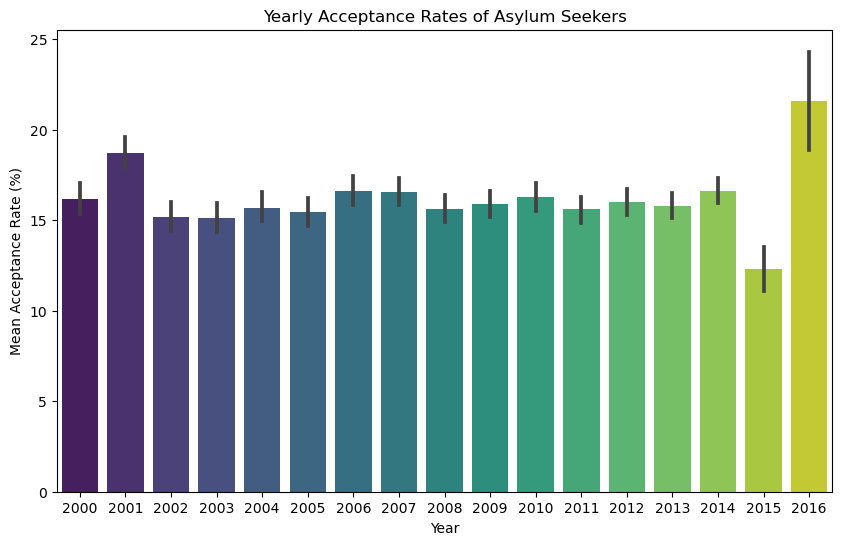

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df['Acceptance Rate (%)'], x=df['Year'], palette="viridis")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Mean Acceptance Rate (%)")
plt.title("Yearly Acceptance Rates of Asylum Seekers")
# plt.grid(axis='x', alpha=0.7)

# Show the plot
plt.show()

In [14]:
df['Rejected'] = pd.to_numeric(df['Rejected'], errors='coerce')

df['Rejection rate (%)'] = (df['Rejected']/df['Total decisions'])*100
df['Rejection rate (%)'].head()

0     0.000000
2     9.443508
3    12.400000
4    18.681319
5    59.970888
Name: Rejection rate (%), dtype: float64

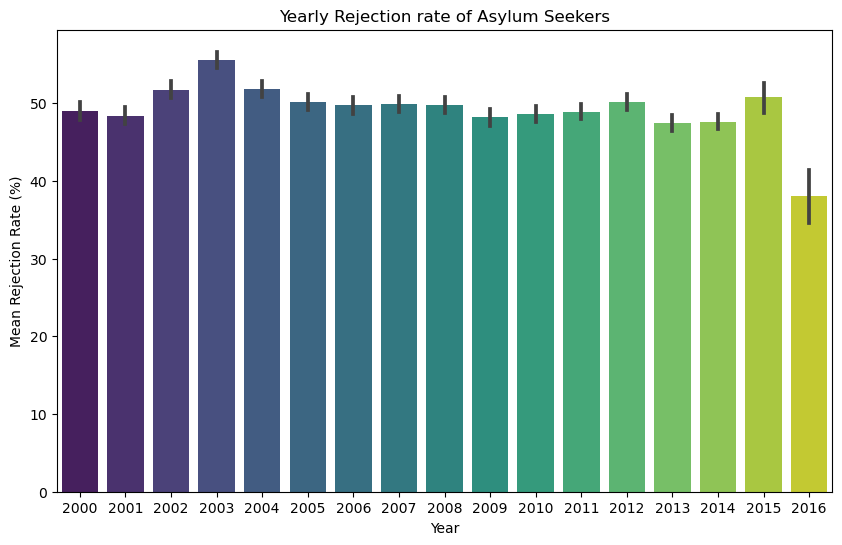

In [12]:
df_grouped = df.groupby("Territory of Assylum", as_index=False).agg(
    {"Rejection rate (%)": "mean", "Rejection rate (%)": "mean"}
)

# # Create a scattergeo map with hover data
# fig = px.scatter_geo(
#     df_grouped,
#     locations="Territory of Assylum",  # Uses country names
#     locationmode="country names",
#     size="Acceptance Rate (%)",  # Adjust marker size based on acceptance rate
#     color="Acceptance Rate(%)",  # Color represents acceptance rate
#     hover_name="Territory of Assylum",  # Show country name
#     hover_data={"Acceptance Rate (%)": ":.2f", "Rejection Rate (%)": ":.2f"},  # Display rates
#     title="Asylum Applications: Acceptance & Rejection Rates by Country",
#     color_continuous_scale="Viridis"  # Color gradient
# )

# fig.show()

plt.figure(figsize=(10, 6))
sns.barplot(y=df['Rejection rate (%)'], x=df['Year'], palette="viridis")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Mean Rejection Rate (%)")
plt.title("Yearly Rejection rate of Asylum Seekers")
# plt.grid(axis='x', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
df.info()

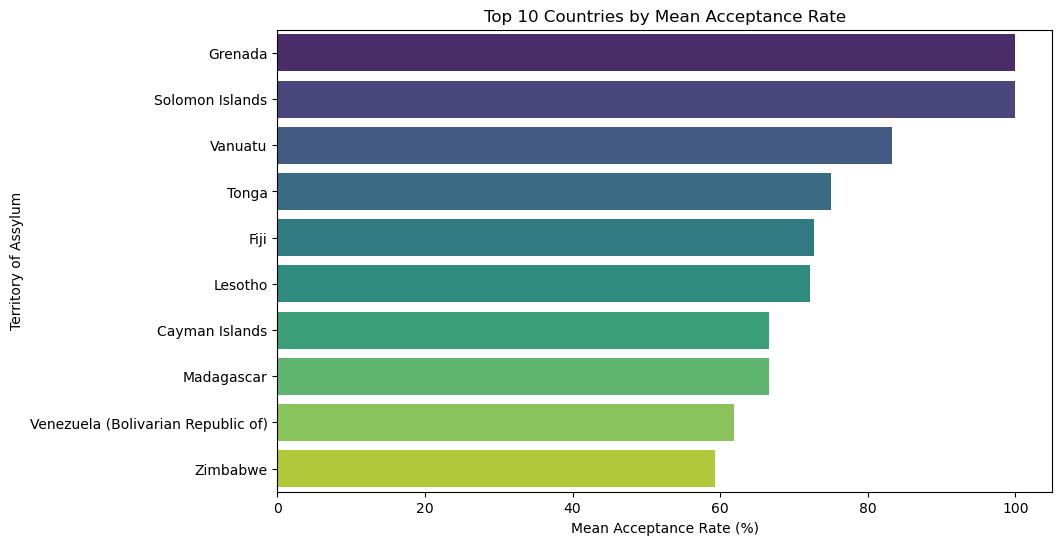

In [13]:
df_country_acceptance = df.groupby('Territory of Assylum', as_index=False)['Acceptance Rate (%)'].mean()

# 2. Sort by acceptance rate in descending order (optional)
df_country_acceptance = df_country_acceptance.sort_values('Acceptance Rate (%)', ascending=False)

# 3. (Optional) Limit to top 10 countries for readability
df_top_countries = df_country_acceptance.head(10)

# 4. Plot a bar chart (horizontal bar for readability)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_countries, 
    y='Territory of Assylum', 
    x='Acceptance Rate (%)', 
    palette='viridis'
)

# 5. Add labels and title
plt.title("Top 10 Countries by Mean Acceptance Rate")
plt.xlabel("Mean Acceptance Rate (%)")
plt.ylabel("Territory of Assylum")

# 6. Display the plot
plt.show()

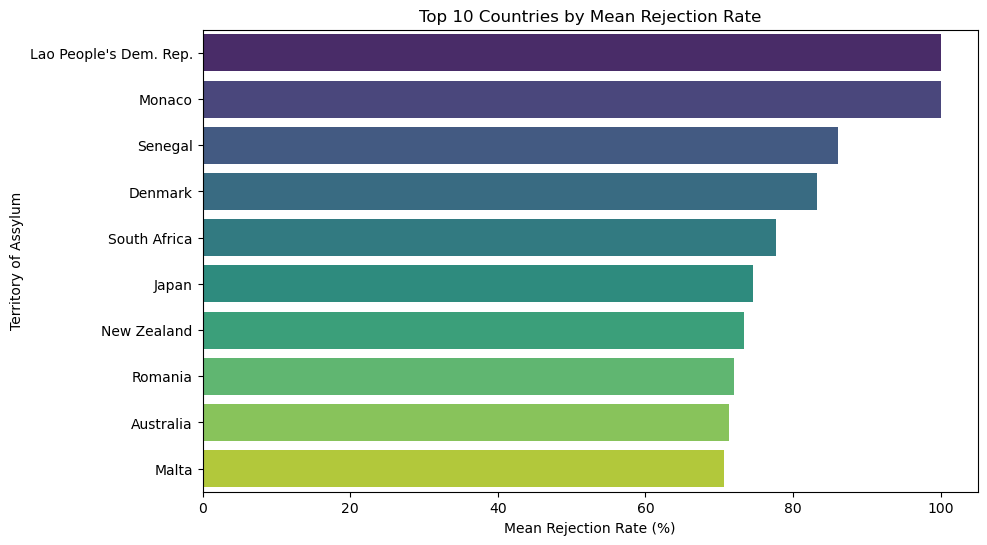

In [14]:
df_country_acceptance = df.groupby('Territory of Assylum', as_index=False)['Rejection rate (%)'].mean()

# 2. Sort by acceptance rate in descending order (optional)
df_country_acceptance = df_country_acceptance.sort_values('Rejection rate (%)', ascending=False)

# 3. (Optional) Limit to top 10 countries for readability
df_top_countries = df_country_acceptance.head(10)

# 4. Plot a bar chart (horizontal bar for readability)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_countries, 
    y='Territory of Assylum', 
    x='Rejection rate (%)', 
    palette='viridis'
)

# 5. Add labels and title
plt.title("Top 10 Countries by Mean Rejection Rate")
plt.xlabel("Mean Rejection Rate (%)")
plt.ylabel("Territory of Assylum")

# 6. Display the plot
plt.show()

# Phase 3 : Model Building 

# How can we use historical data to predict the acceptance rate for asylum seekers? 

In [ ]:
df.head()

In [ ]:
features = ['Territory of Assylum', 'Origin', 'UNHCR-assisted(start-year)', 'RSD procedure']
X_train = df[features]
X_train.shape

In [ ]:
target = "Acceptance Rate (%)"
y_train = df[target]
y_train.head()

In [ ]:
# building the model. First we create the baseline
y_mean = y_train.mean()
y_mean

In [ ]:
#creating the baseline
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

In [ ]:
df['UNHCR-assisted(start-year)'] = pd.to_numeric(df['UNHCR-assisted(start-year)'], errors='coerce')

In [ ]:
df.info()
df.dropna()
# df['UNHCR-assisted(start-year)'].fillna(df['UNHCR-assisted(start-year)'].median(), inplace=True)  # Fill with median


In [ ]:
#calculating the BASELINE mean absolute error for my predictions
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean acceptance rate is: ", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

In [ ]:
df = pd.get_dummies(df, columns=['Territory of Assylum', 'Origin', 'RSD procedure'], drop_first=True)


In [ ]:
X = df.drop(columns=['Acceptance Rate (%)'])  # Adjust column name if different
y = (df['Acceptance Rate (%)'] > 50).astype(int) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[['UNHCR-assisted(start-year)']] = scaler.fit_transform(X_train[['UNHCR-assisted(start-year)']])
X_test[['UNHCR-assisted(start-year)']] = scaler.transform(X_test[['UNHCR-assisted(start-year)']])

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
df['Acceptance Rate(%)']

In [ ]:
df.info()

# Phase 4 : Data Analysis
## In this phase, I perform a detailed analysis of the state of assylum seeking and refugees via the cleaned dataset and model

## Q1: How have Acceptance Rates changed over the years?

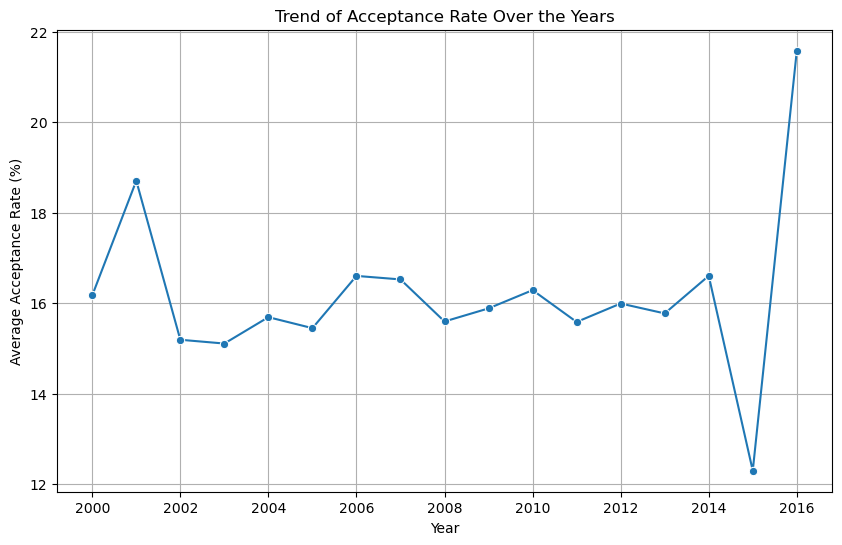

In [16]:
avg_acceptance_by_year = df.groupby('Year', as_index=False)['Acceptance Rate (%)'].mean()

# Plot a line graph to show the trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_acceptance_by_year, x='Year', y='Acceptance Rate (%)', marker='o')
plt.title("Trend of Acceptance Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Acceptance Rate (%)")
plt.grid(True)
plt.show()

## Q2: What is the total number of asylum applications per year?

    Year  Applied during year
0   2000                  0.0
1   2001                  0.0
2   2002                  0.0
3   2003                  0.0
4   2004                  0.0
5   2005                  0.0
6   2006                  0.0
7   2007                  0.0
8   2008                  0.0
9   2009                  0.0
10  2010             673641.0
11  2011             840276.0
12  2012             889833.0
13  2013            1032938.0
14  2014            1559506.0
15  2015            1031311.0
16  2016             331392.0


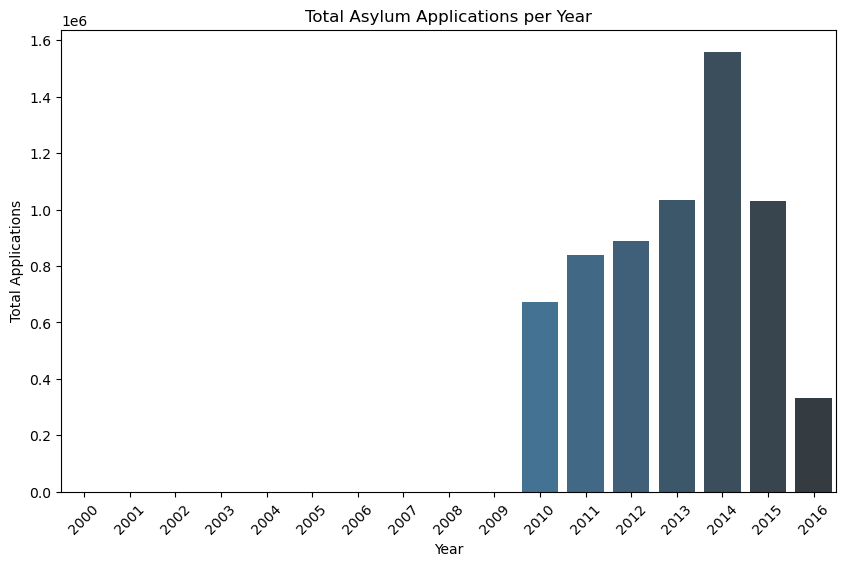

In [17]:
df['Applied during year'] = pd.to_numeric(df['Applied during year'].str.replace(',', '').str.strip(), errors='coerce')

# Group by Year and sum up the applications
applications_by_year = df.groupby('Year', as_index=False)['Applied during year'].sum()

# Display the result
print(applications_by_year)

# Optional: Plot the number of applications per year
plt.figure(figsize=(10, 6))
sns.barplot(data=applications_by_year, x='Year', y='Applied during year', palette='Blues_d')
plt.title("Total Asylum Applications per Year")
plt.xlabel("Year")
plt.ylabel("Total Applications")
plt.xticks(rotation=45)
plt.show()

## Q3 Which Origin countries are most common among asylum seekers?

                   Origin  Count
0  Dem. Rep. of the Congo   1617
1                    Iraq   1606
2                 Somalia   1576
3                   Sudan   1511
4  Iran (Islamic Rep. of)   1451
5                 Nigeria   1447
6             Afghanistan   1425
7                Ethiopia   1395
8                Pakistan   1375
9           Côte d'Ivoire   1229


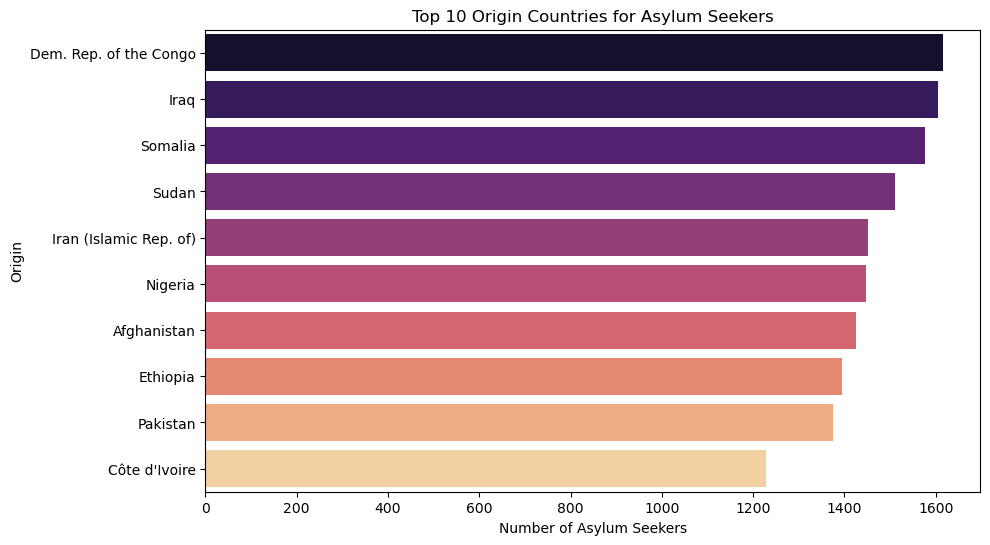

In [18]:
origin_counts = df['Origin'].value_counts().reset_index()
origin_counts.columns = ['Origin', 'Count']

# Display the top 10 most common origins
print(origin_counts.head(10))

# Optional: Visualize the top 10 origins
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts.head(10), x='Count', y='Origin', palette='magma')
plt.title("Top 10 Origin Countries for Asylum Seekers")
plt.xlabel("Number of Asylum Seekers")
plt.ylabel("Origin")
plt.show()

## Q4 : What is the distribution of Rejection Rates (%) in the dataset?

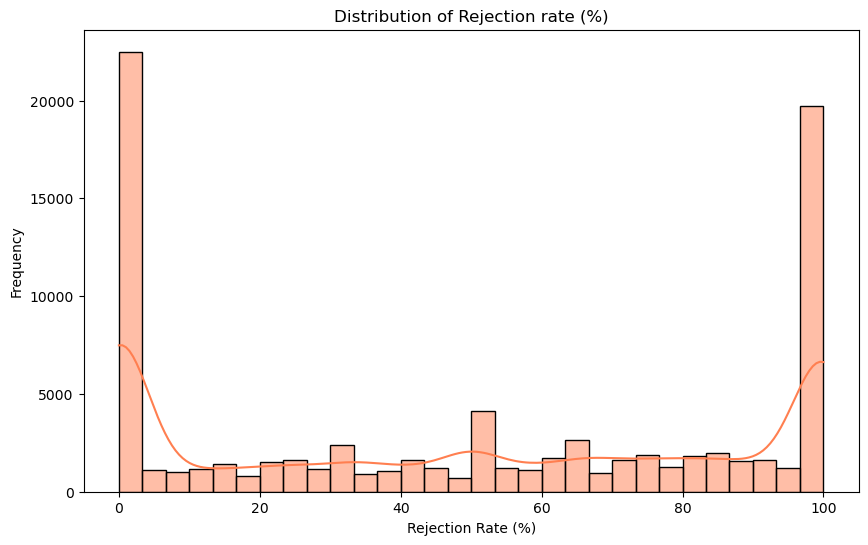

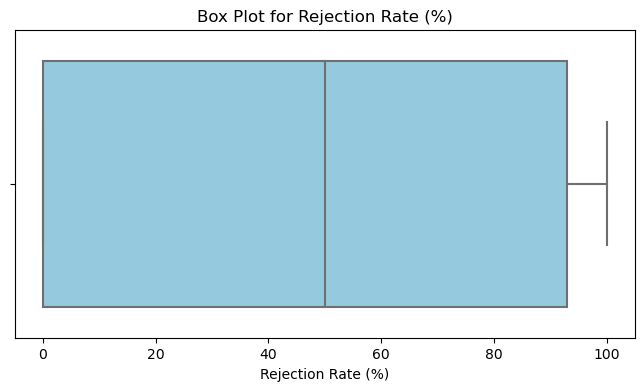

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rejection rate (%)'].dropna(), bins=30, kde=True, color='coral')
plt.title("Distribution of Rejection rate (%)")
plt.xlabel("Rejection Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Optional: Box plot to highlight outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Rejection rate (%)'].dropna(), color='skyblue')
plt.title("Box Plot for Rejection Rate (%)")
plt.xlabel("Rejection Rate (%)")
plt.show()

## Q5 : Is there a correlation between the number of applications and the Acceptance Rate (%)?

In [ ]:
df['Applied during year'] = pd.to_numeric(df['Applied during year'].str.replace(',', '').str.strip(), errors='coerce')

# Plot a scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Applied during year', y='Acceptance Rate (%)', alpha=0.5)
plt.title("Relationship Between Applications and Acceptance Rate (%)")
plt.xlabel("Applications during Year")
plt.ylabel("Acceptance Rate (%)")
plt.show()

# Calculate and print the correlation coefficient
correlation = df['Applied during year'].corr(df['Acceptance Rate (%)'])
print(f"Correlation between applications and acceptance rate: {correlation:.2f}")

In [15]:
df['Origin'] = df['Origin'].str.strip().str.title()  # Standardize to title case
df['Territory of Assylum'] = df['Territory of Assylum'].str.strip().str.title()

# Also, ensure the acceptance and rejection rate columns are numeric
df['Acceptance Rate (%)'] = pd.to_numeric(df['Acceptance Rate (%)'], errors='coerce')
df['Rejection rate (%)'] = pd.to_numeric(df['Rejection rate (%)'], errors='coerce')

def get_refugee_rates():
    # Prompt user for input
    origin_input = input("Enter your country of origin: ").strip().title()
    asylum_input = input("Enter the country where you want to seek refuge: ").strip().title()
    
    # Filter the dataset for the provided origin and asylum territory
    filtered_data = df[(df['Origin'] == origin_input) & (df['Territory of Assylum'] == asylum_input)]
    
    if filtered_data.empty:
        print("\nSorry, no data is available for the combination of your inputs.")
        print("Please try a different combination or check your spelling.")
    else:
        # Calculate mean acceptance and rejection rates for the filtered data
        mean_acceptance = filtered_data['Acceptance Rate (%)'].mean()
        mean_rejection = filtered_data['Rejection rate (%)'].mean()
        
        print(f"\nBased on our data:")
        print(f" - The average acceptance rate for asylum seekers from {origin_input} in {asylum_input} is: {mean_acceptance:.2f}%")
        print(f" - The average rejection rate for asylum seekers from {origin_input} in {asylum_input} is: {mean_rejection:.2f}%")

# Run the function to test it:
get_refugee_rates()

Enter your country of origin: Tanzania
Enter the country where you want to seek refuge: United Kingdom

Sorry, no data is available for the combination of your inputs.
Please try a different combination or check your spelling.


In [19]:
df.columns = df.columns.str.strip()
df['Origin'] = df['Origin'].str.strip().str.title()
df['Territory of Assylum'] = df['Territory of Assylum'].str.strip().str.title()

# Convert rates to numeric
df['Acceptance Rate (%)'] = pd.to_numeric(df['Acceptance Rate (%)'], errors='coerce')
df['Rejection rate (%)'] = pd.to_numeric(df['Rejection rate (%)'], errors='coerce')

# Extract unique valid country names from the dataset
origins = sorted(df['Origin'].dropna().unique())
asylum_countries = sorted(df['Territory of Assylum'].dropna().unique())

# Create dropdown widgets populated with the unique country names
origin_dropdown = widgets.Dropdown(
    options=origins,
    description='Origin:',
    value=origins[0]  # default value
)
asylum_dropdown = widgets.Dropdown(
    options=asylum_countries,
    description='Asylum:',
    value=asylum_countries[0]  # default value
)

def show_rates(origin, asylum):
    # Filter dataset based on the dropdown selections
    filtered_data = df[(df['Origin'] == origin) & (df['Territory of Assylum'] == asylum)]
    
    if filtered_data.empty:
        print("No data available for the selected combination. Please try another selection.")
    else:
        mean_acceptance = filtered_data['Acceptance Rate (%)'].mean()
        mean_rejection = filtered_data['Rejection rate (%)'].mean()
        print(f"\nFor asylum seekers from {origin} seeking refuge in {asylum}:")
        print(f"  Acceptance Rate: {mean_acceptance:.2f}%")
        print(f"  Rejection Rate: {mean_rejection:.2f}%")

# Create interactive dropdowns using ipywidgets.interact
widgets.interact(show_rates, origin=origin_dropdown, asylum=asylum_dropdown)

interactive(children=(Dropdown(description='Origin:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<function __main__.show_rates(origin, asylum)>

In [24]:
df.columns = df.columns.str.strip()
df['Origin'] = df['Origin'].str.strip().str.title()
df['Territory of Assylum'] = df['Territory of Assylum'].str.strip().str.title()

# Convert acceptance and rejection rate columns to numeric
df['Acceptance Rate (%)'] = pd.to_numeric(df['Acceptance Rate (%)'], errors='coerce')
df['Rejection rate (%)'] = pd.to_numeric(df['Rejection rate (%)'], errors='coerce')

# Create lists of unique valid countries from the dataset
origins = sorted(df['Origin'].dropna().unique())
asylum_countries = sorted(df['Territory of Assylum'].dropna().unique())

# Create dropdown widgets populated with valid options
origin_dropdown = widgets.Dropdown(options=origins, description='Origin:')
asylum_dropdown = widgets.Dropdown(options=asylum_countries, description='Asylum:')

# Create an output widget to display results
output = widgets.Output()

def show_rates(origin, asylum):
    with output:
        clear_output()  # Clear previous output
        # Filter the dataset based on the selected origin and asylum country
        filtered_data = df[(df['Origin'] == origin) & (df['Territory of Assylum'] == asylum)]
        
        if filtered_data.empty:
            print("No data available for the selected combination. Please try another selection.")
        else:
            mean_acceptance = filtered_data['Acceptance Rate (%)'].mean()
            mean_rejection = filtered_data['Rejection rate (%)'].mean()
            print(f"For asylum seekers from {origin} seeking refuge in {asylum}:")
            print(f"  Acceptance Rate: {mean_acceptance:.2f}%")
            print(f"  Rejection Rate: {mean_rejection:.2f}%")

# Use interact_manual so the function runs when you click the button
widgets.interact_manual(show_rates, origin=origin_dropdown, asylum=asylum_dropdown)
display(output)

interactive(children=(Dropdown(description='Origin:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

Output()